# 1. Import lib

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.float_format", "{:.1f}".format)

## Add data


In [32]:
df = pd.read_csv('movies_data_processed.csv')
df

,name,genres,type,rating,no_of_votes,meta_score,release_date,gross,budget,countries,url,ROI,result
0,Attack on Titan,"Action Epic, Adult Animation, Anime, Shōnen, S...",TV Series,9.1,591000.0,NaN,2013.0,NaN,NaN,Japan,https://www.imdb.com/title/tt2560140/?ref_=sr_...,NaN,Success
1,Love Hurts,"Martial Arts, Action, Comedy",Movie,5.3,6800.0,34.0,2025.0,17235040.0,18000000.0,United States,https://www.imdb.com/title/tt30788842/?ref_=sr...,-0.0,Fail
2,The Quick and the Dead,"Action, Drama, Romance, Thriller, Western",Movie,6.5,107000.0,49.0,1995.0,18636537.0,32000000.0,"United States, Japan",https://www.imdb.com/title/tt0114214/?ref_=sr_...,-0.4,Success
3,The Equalizer,"Cop Drama, Police Procedural, Action, Crime, D...",TV Series,5.6,19000.0,NaN,2021.0,NaN,NaN,United States,https://www.imdb.com/title/tt11242246/?ref_=sr...,NaN,Fail
4,Goosebumps,"Teen Horror, Action, Adventure, Comedy, Drama,...",TV Series,6.7,15000.0,NaN,2023.0,NaN,NaN,"United States, Canada, France",https://www.imdb.com/title/tt17720272/?ref_=sr...,NaN,Fail
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7989,Chuka,Western,Movie,6.3,1100.0,NaN,1967.0,NaN,NaN,United States,https://www.imdb.com/title/tt0061477/?ref_=sr_...,NaN,Fail
7990,Unforgiven,"Period Drama, Tragedy, Drama, Western",Movie,8.2,451000.0,85.0,1992.0,159167799.0,14400000.0,United States,https://www.imdb.com/title/tt0105695/?ref_=sr_t_3,10.1,Success
7991,The Duel,"Drama, Western",Movie,5.8,12000.0,42.0,2016.0,20672.0,10000000.0,United States,https://www.imdb.com/title/tt2436682/?ref_=sr_...,-1.0,Fail
7992,Calamity Jane,"Classic Musical, Musical, Romance, Western",Movie,7.2,11000.0,74.0,1953.0,7150.0,NaN,United States,https://www.imdb.com/title/tt0045591/?ref_=sr_...,NaN,Success


In [33]:
df = df[df['release_date'] < 2025]

# 2. Phân tích data theo thể loại TV series và movies (Phần 4)

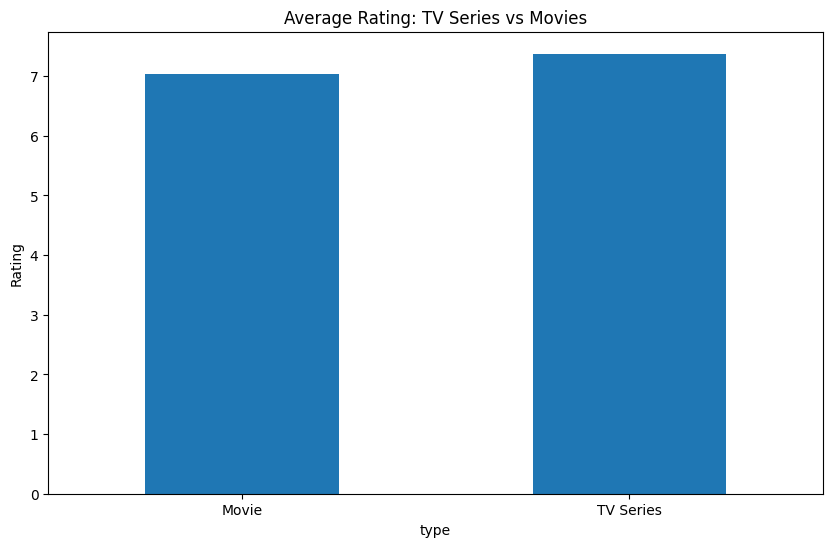


Average ratings:
type
Movie       7.0
TV Series   7.4
Name: rating, dtype: float64


In [34]:
# So sánh rating trung bình giữa TV Series và Movies
avg_ratings = df.groupby('type')['rating'].mean()
plt.figure(figsize=(10,6))
avg_ratings.plot(kind='bar')
plt.title('Average Rating: TV Series vs Movies')
plt.ylabel('Rating')
plt.xticks(rotation=0)
plt.show()

print("\nAverage ratings:")
print(avg_ratings)


<Figure size 1200x600 with 0 Axes>

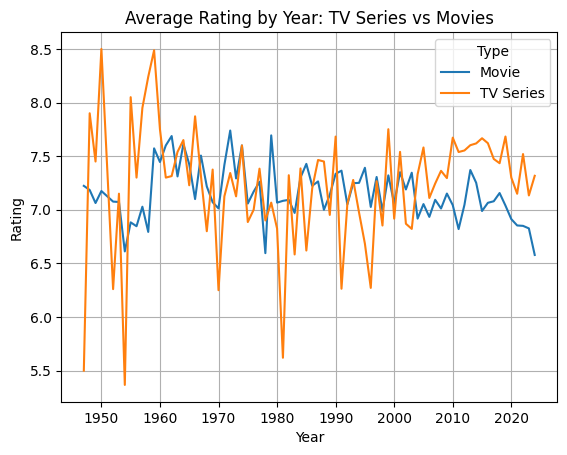


Yearly average ratings:
type          Movie  TV Series
release_date                  
1947.0          7.2        5.5
1948.0          7.2        7.9
1949.0          7.1        7.5
1950.0          7.2        8.5
1952.0          7.1        6.3
...             ...        ...
2020.0          6.9        7.3
2021.0          6.9        7.1
2022.0          6.8        7.5
2023.0          6.8        7.1
2024.0          6.6        7.3

[77 rows x 2 columns]


In [35]:
# Tính rating trung bình theo năm và type
yearly_ratings = df.groupby(['release_date', 'type'])['rating'].mean().unstack()
yearly_ratings = yearly_ratings.dropna()

# Vẽ biểu đồ line
plt.figure(figsize=(12, 6))
yearly_ratings.plot(kind='line')
plt.title('Average Rating by Year: TV Series vs Movies')
plt.xlabel('Year')
plt.ylabel('Rating')
plt.legend(title='Type')
plt.grid(True)
plt.show()

print("\nYearly average ratings:")
print(yearly_ratings)

<Figure size 1200x600 with 0 Axes>

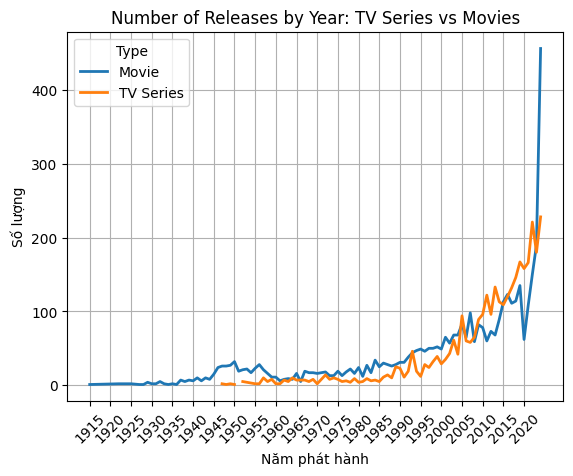

In [36]:
# Nhóm dữ liệu theo năm và loại
yearly_counts = df.groupby(['release_date', 'type']).size().unstack()

# Vẽ biểu đồ
plt.figure(figsize=(12, 6))  # Kéo dài kích thước
yearly_counts.plot(kind='line', linewidth=2,markersize=2)

# Làm mượt bằng rolling trung bình 3 năm (tùy chỉnh nếu cần)
# smoothed = yearly_counts.rolling(window=3, min_periods=1).mean()
# smoothed.plot(kind='line', linewidth=2, alpha=0.8)

# Cấu hình trục x
plt.xticks(range(int(df["release_date"].min()), int(df["release_date"].max()) + 1, 5), rotation=45)

plt.title('Number of Releases by Year: TV Series vs Movies')
plt.xlabel('Năm phát hành')
plt.ylabel('Số lượng')
plt.legend(title='Type')
plt.grid(True)
plt.show()


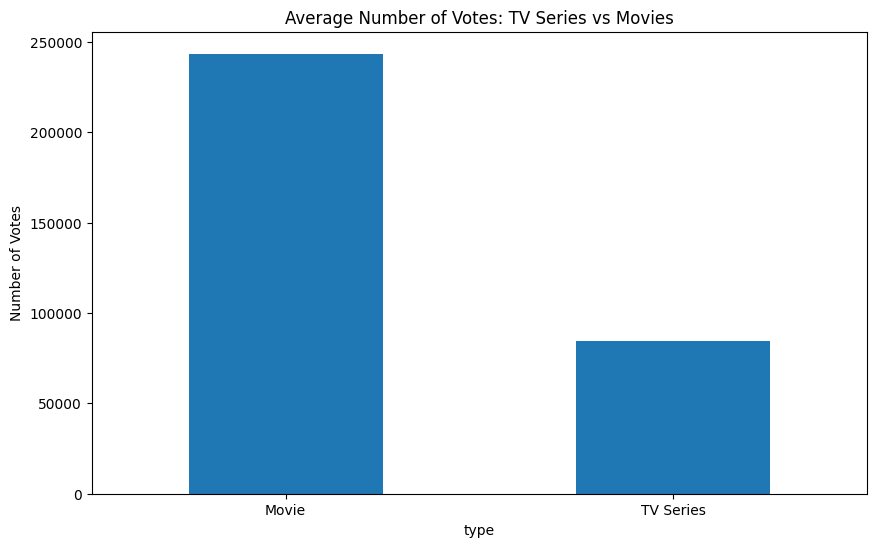


Average number of votes:
type
Movie       243469.7
TV Series    84288.9
Name: no_of_votes, dtype: float64


In [37]:
# So sánh số lượng vote trung bình
avg_votes = df.groupby('type')['no_of_votes'].mean()
plt.figure(figsize=(10,6))
avg_votes.plot(kind='bar')
plt.title('Average Number of Votes: TV Series vs Movies')
plt.ylabel('Number of Votes')
plt.xticks(rotation=0)
plt.show()

print("\nAverage number of votes:")
print(avg_votes)

C:\Users\Admin\AppData\Local\Temp\ipykernel_22668\3327133561.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['genres_list'] = df['genres'].str.split(',')


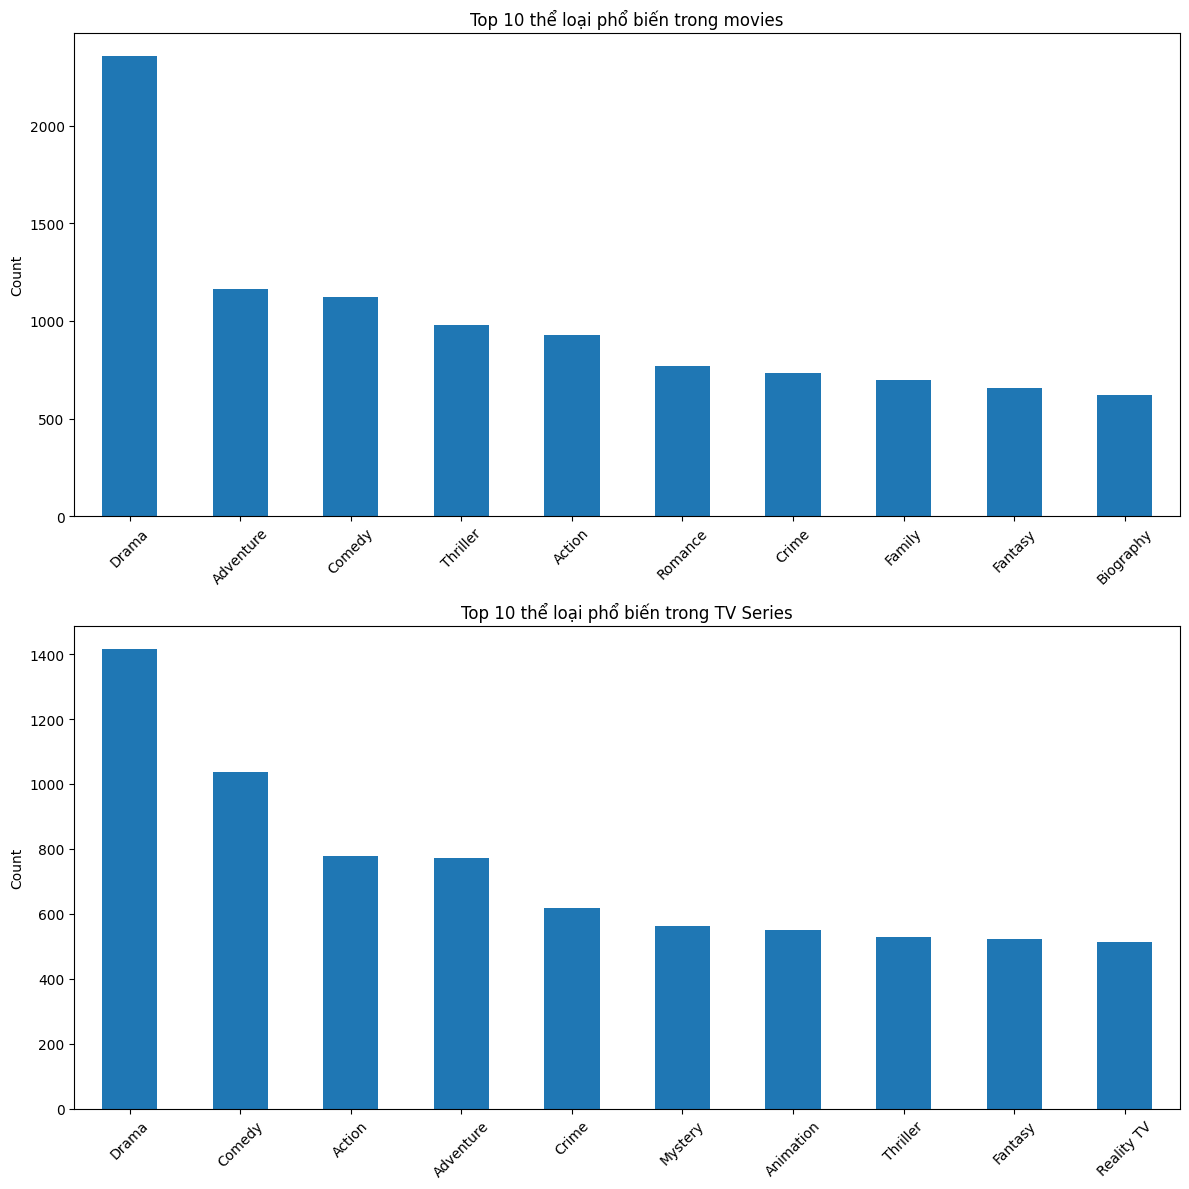


Top 5 genres in Movies:
Drama        2356
Adventure    1164
Comedy       1122
Thriller      978
Action        929
dtype: int64

Top 5 genres in TV Series:
Drama        1416
Comedy       1037
Action        777
Adventure     773
Crime         617
dtype: int64


In [38]:
# Tách cột genres thành list các thể loại
df['genres_list'] = df['genres'].str.split(',')

# Tạo hàm đếm thể loại
def count_genres(data):
    genre_counts = {}
    for genres in data['genres_list']:
        if isinstance(genres, list):
            for genre in genres:
                genre = genre.strip()
                genre_counts[genre] = genre_counts.get(genre, 0) + 1
    return pd.Series(genre_counts).sort_values(ascending=False)

# Phân tích thể loại phổ biến cho Movies và TV Series
movies_genres = count_genres(df[df['type'] == 'Movie'])
tv_genres = count_genres(df[df['type'] == 'TV Series'])

# Vẽ biểu đồ top 10 thể loại phổ biến
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))

movies_genres.head(10).plot(kind='bar', ax=ax1)
ax1.set_title('Top 10 thể loại phổ biến trong movies')
ax1.set_ylabel('Count')
ax1.tick_params(axis='x', rotation=45)

tv_genres.head(10).plot(kind='bar', ax=ax2)
ax2.set_title('Top 10 thể loại phổ biến trong TV Series')
ax2.set_ylabel('Count')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

print("\nTop 5 genres in Movies:")
print(movies_genres.head())
print("\nTop 5 genres in TV Series:")
print(tv_genres.head())